In [8]:
import pandas as pd
import os
import seaborn as sns

path =  os.path.dirname((os.path.dirname(os.path.abspath(".."))))
filepath_AAPL = "/data/AAPL.csv"
filepath_GOOG = "/data/GOOG.csv"
filepath_AMZN = "/data/AMZN.csv"
filepath_NDX100 = "/data/^NDX.csv"
filepath_TSLA = "/data/TSLA.csv"

In [18]:
data_aapl = pd.read_csv(path + filepath_AAPL)
data_goog = pd.read_csv(path + filepath_GOOG)
data_amzn = pd.read_csv(path + filepath_AMZN)
data_ndx100 = pd.read_csv(path + filepath_NDX100)
data_tsla = pd.read_csv(path + filepath_TSLA)

data_sets = {"AAPL": data_aapl, 
             "GOOG": data_goog, 
             "AMZN": data_amzn, 
             "NDX100":data_ndx100, 
             "TSLA": data_tsla
             }


In [19]:
def transform_data(data):
    
    ## datetime column
    data["Date"] = pd.to_datetime(data["Date"], format='%Y-%m-%d')
    
    ## convert datetime to time attributes
    data["Date_Day"] = data["Date"].dt.day
    data["Date_Month"] = data["Date"].dt.month
    data["Date_Year"] = data["Date"].dt.year
    
    
    ## create columns for share value perfomance on daily bases
    data["Open_diff"] = data["Open"].diff().fillna(0)
    data["Open_diff_pct"] = data["Open"].pct_change().fillna(0) * 100

In [21]:
for key,d_set in data_sets.items():
    print(key, "transformed")
    d_set = transform_data(d_set)

AAPL transformed
GOOG transformed
AMZN transformed
NDX100 transformed
TSLA transformed


In [23]:
data_apple = data_sets["AAPL"].copy()

In [24]:
data_apple.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Day,Date_Month,Date_Year,Open_diff,Open_diff_pct
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400.0,12,12,1980,0.000000,0.000000
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200.0,15,12,1980,-0.024554,-4.782691
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000.0,16,12,1980,-0.035714,-7.305882
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400.0,17,12,1980,0.008929,1.970538
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400.0,18,12,1980,0.013392,2.898363
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.398628,12157600.0,19,12,1980,0.029018,6.103322
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.418030,9340800.0,22,12,1980,0.024554,4.867344
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.435669,11737600.0,23,12,1980,0.022321,4.219327
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.458599,12000800.0,24,12,1980,0.029018,5.263187
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.500931,13893600.0,26,12,1980,0.053572,9.230870


In [25]:
data_apple["Date_Year"].value_counts().sort_index()

1980     13
1981    253
1982    253
1983    253
1984    253
1985    252
1986    253
1987    253
1988    253
1989    252
1990    253
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    139
Name: Date_Year, dtype: int64

In [26]:
data_apple_past_2010 = data_apple[data_apple["Date_Year"] >= 2010].copy()

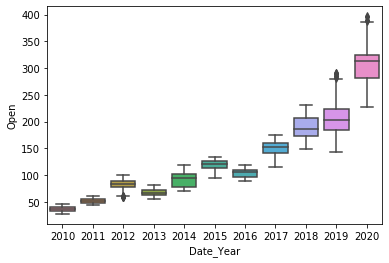

In [27]:
sns.boxplot(y=data_apple_past_2010["Open"], x=data_apple_past_2010["Date_Year"])

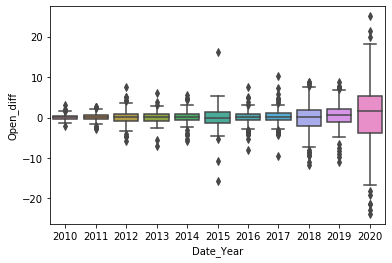

In [28]:
sns.boxplot(y=data_apple_past_2010["Open_diff"], x=data_apple_past_2010["Date_Year"])

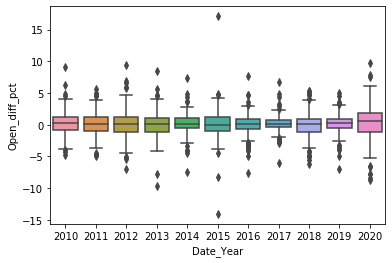

In [29]:
sns.boxplot(y=data_apple_past_2010["Open_diff_pct"], x=data_apple_past_2010["Date_Year"])

# ANOVA daily bases

In [31]:
def seperate_years_and_attr(data, timespan, target_attr):
    
    start_year, end_year = timespan[0], timespan[1]
    
    year = start_year
    data_sets = []
    
    while(year <=end_year):
        
        selected_year = data[target_attr][data["Date_Year"] == year].copy()
        
        data_sets.append(selected_year)
        year = year + 1
        
    return data_sets

In [33]:
years = seperate_years_and_attr(data_apple_past_2010, timespan=[2010, 2019], target_attr="Open_diff_pct")

In [36]:
len(years)

10

In [39]:
import scipy.stats as stats


stats.f_oneway(*years)

F_onewayResult(statistic=0.5843603844887477, pvalue=0.8109824950220735)

In [40]:
stats.levene(*years)

LeveneResult(statistic=8.770112648644686, pvalue=4.371488263736035e-13)

Date_Year
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Open_diff_pct, dtype: object

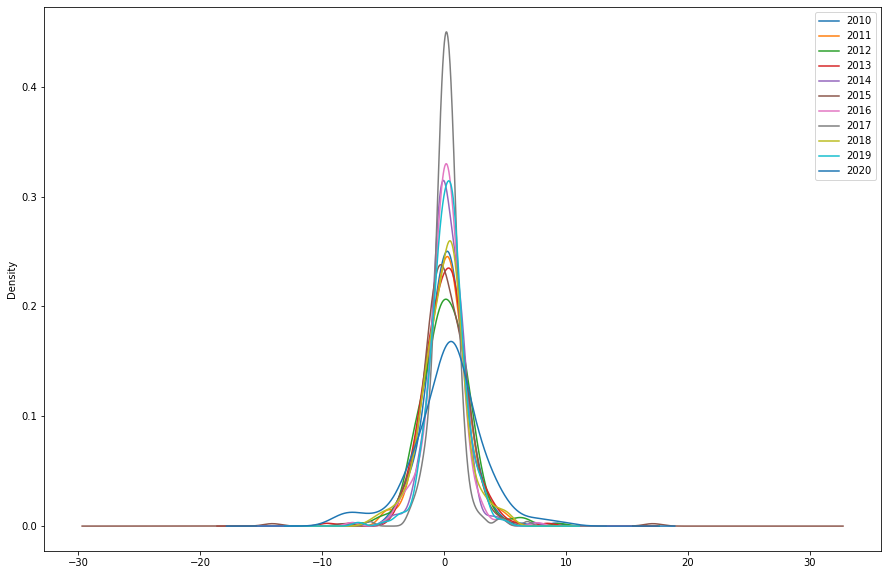

In [37]:
data_past_2010.groupby(by="Date_Year")["Open_diff_pct"].plot.kde(figsize=(15,10), legend=True)

In [26]:
data_apple_past_2010 = data_apple[data_apple["Date_Year"] >= 2010].copy()

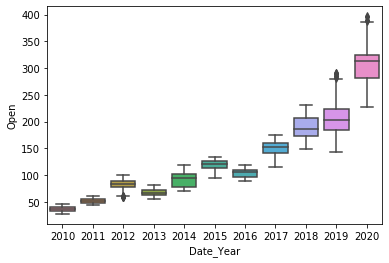

In [27]:
sns.boxplot(y=data_apple_past_2010["Open"], x=data_apple_past_2010["Date_Year"])

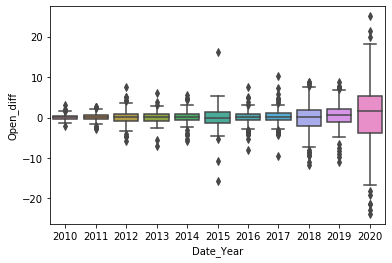

In [28]:
sns.boxplot(y=data_apple_past_2010["Open_diff"], x=data_apple_past_2010["Date_Year"])

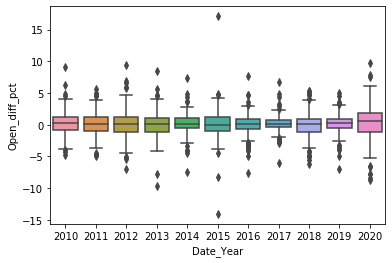

In [29]:
sns.boxplot(y=data_apple_past_2010["Open_diff_pct"], x=data_apple_past_2010["Date_Year"])

# ANOVA montly bases

In [52]:
data_apple_past_2010_monthly = data_apple_past_2010.groupby(by="Date_Month").mean().reset_index()

In [53]:
data_apple_past_2010_monthly

,Date_Month,Open,High,Low,Close,Adj Close,Volume,Date_Day,Date_Year,Open_diff,Open_diff_pct
0,1,115.551512,116.629334,114.425164,115.592518,109.358182,8.543268e+07,16.560538,2015.058296,0.108821,0.008082
1,2,117.181300,118.552099,116.175098,117.461841,111.288044,7.745826e+07,14.502370,2014.990521,0.019899,0.205676
2,3,117.142221,118.721369,115.728571,117.248750,110.918664,7.786222e+07,15.829167,2014.962500,0.141244,0.204294
3,4,120.693177,121.876986,119.497237,120.732205,114.308713,7.844273e+07,15.596491,2015.004386,0.166454,0.108982
4,5,124.849320,126.153660,123.789841,125.062134,118.834792,7.464302e+07,15.450644,2015.017167,0.214280,0.132162
5,6,129.119313,130.306979,127.924061,129.141653,123.026972,6.638355e+07,15.489362,2014.987234,0.138498,-0.029538
6,7,127.175860,128.242596,126.163828,127.229473,120.747938,6.638649e+07,16.182222,2014.853333,0.425733,0.328637
7,8,114.947636,116.097880,113.930858,115.074427,108.244626,7.055181e+07,16.004484,2014.506726,0.238277,0.178918
8,9,117.132393,118.156094,115.967030,117.047783,110.127660,7.890258e+07,16.108374,2014.463054,0.035756,0.092843
9,10,122.134052,123.276721,120.922318,122.195286,115.232111,7.455087e+07,15.863636,2014.568182,0.234234,0.191630


In [47]:
years = seperate_years_and_attr(data_apple_past_2010_monthly, timespan=[2010, 2019], target_attr="Open_diff_pct")

In [48]:
len(years)

10

In [49]:
stats.f_oneway(*years)

/Users/ameinert/anaconda2/envs/prognos/lib/python3.7/site-packages/scipy/stats/stats.py:3348: RuntimeWarning: invalid value encountered in double_scalars
  msw = sswn / dfwn


F_onewayResult(statistic=nan, pvalue=nan)

In [50]:
stats.levene(*years)

/Users/ameinert/anaconda2/envs/prognos/lib/python3.7/site-packages/scipy/stats/morestats.py:2369: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


LeveneResult(statistic=nan, pvalue=nan)

Date_Year
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Open_diff_pct, dtype: object

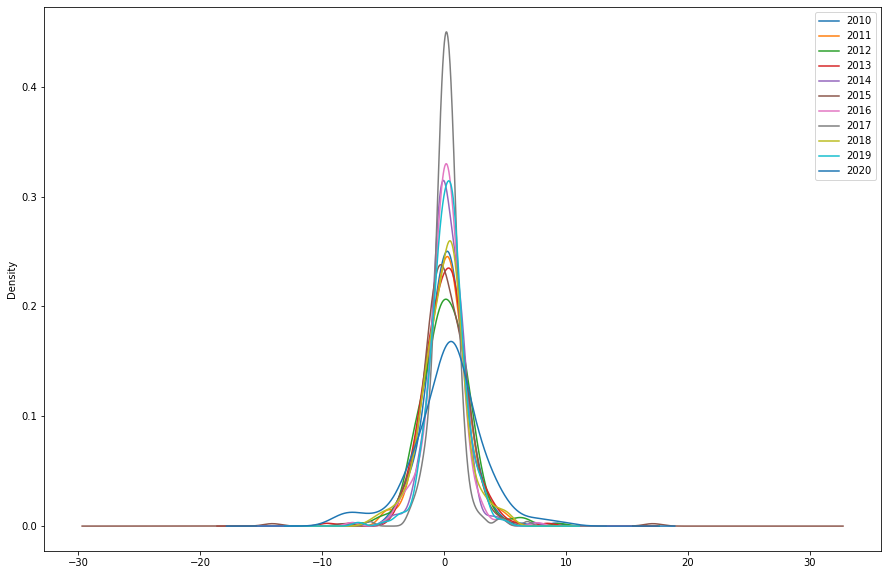

In [37]:
data_past_2010.groupby(by="Date_Year")["Open_diff_pct"].plot.kde(figsize=(15,10), legend=True)